In [50]:
import gempy as gp
from gempy.assets import topology as tp

import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [51]:
geo_model = gp.create_model('Tutorial_ch1_1_Basics')

In [52]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 2000., 0, 2000., 0, 750.], [50, 50, 50],
             path_o=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_orientations.csv",
             path_i=data_path + "/data/input_data/getting_started/"
                                "simple_fault_model_points.csv",
             default_values=True)

Active grids: ['regular']


Tutorial_ch1_1_Basics  2022-08-31 14:11

In [53]:
geo_model.get_data()

X     Y           Z    smooth      surface       G_x  \
surface_points 0   1000    50  450.000000  0.000002        Shale       NaN   
               1   1000   150  433.333333  0.000002        Shale       NaN   
               2   1000   300  433.333333  0.000002        Shale       NaN   
               3   1000   500  466.666667  0.000002        Shale       NaN   
               4   1000  1000  533.333333  0.000002        Shale       NaN   
               5   1000  1500  433.333333  0.000002        Shale       NaN   
               6   1000  1700  400.000000  0.000002        Shale       NaN   
               7   1000  1950  416.666667  0.000002        Shale       NaN   
               8      0  1000  366.666667  0.000002        Shale       NaN   
               9    300  1000  333.333333  0.000002        Shale       NaN   
               10   450  1000  316.666667  0.000002        Shale       NaN   
               11  1300  1000  500.000000  0.000002        Shale       NaN   
               12  1600  1000  483.333333  0.000002        Shale       NaN   
               13  1900  1000  500.000000  0.000002        Shale       NaN   
               14  1700   500  466.666667  0.000002        Shale       NaN   
               15  1700  1500  450.000000  0.000002        Shale       NaN   
               16  1000    50  350.000000  0.000002  Sandstone_1       NaN   
               17  1000   150  333.333333  0.000002  Sandstone_1       NaN   
               18  1000   300  333.333333  0.000002  Sandstone_1       NaN   
               19  1000   500  366.666667  0.000002  Sandstone_1       NaN   
               20  1000  1000  433.333333  0.000002  Sandstone_1       NaN   
               21  1000  1500  333.333333  0.000002  Sandstone_1       NaN   
               22  1000  1700  300.000000  0.000002  Sandstone_1       NaN   
               23  1000  1950  316.666667  0.000002  Sandstone_1       NaN   
               24     0  1000  266.666667  0.000002  Sandstone_1       NaN   
               25   300  1000  233.333333  0.000002  Sandstone_1       NaN   
               26  1300  1000  400.000000  0.000002  Sandstone_1       NaN   
               27  1600  1000  383.333333  0.000002  Sandstone_1       NaN   
               28  1900  1000  400.000000  0.000002  Sandstone_1       NaN   
               29  1700   500  366.666667  0.000002  Sandstone_1       NaN   
               30  1700  1500  350.000000  0.000002  Sandstone_1       NaN   
               31  1100   150  506.666667  0.000002    Siltstone       NaN   
               32  1100   300  506.666667  0.000002    Siltstone       NaN   
               33  1100  1500  506.666667  0.000002    Siltstone       NaN   
               34  1100  1700  473.333333  0.000002    Siltstone       NaN   
               35  1100  1950  490.000000  0.000002    Siltstone       NaN   
               36     0  1000  433.333333  0.000002    Siltstone       NaN   
               37   300  1000  400.000000  0.000002    Siltstone       NaN   
               38   600  1000  366.666667  0.000002    Siltstone       NaN   
               39  1300  1000  566.666667  0.000002    Siltstone       NaN   
               40  1600  1000  550.000000  0.000002    Siltstone       NaN   
               41  1900  1000  566.666667  0.000002    Siltstone       NaN   
               42  1700   500  533.333333  0.000002    Siltstone       NaN   
               43  1700  1500  516.666667  0.000002    Siltstone       NaN   
               44     0  1000  500.000000  0.000002  Sandstone_2       NaN   
               45   300  1000  466.666667  0.000002  Sandstone_2       NaN   
               46   600  1000  433.333333  0.000002  Sandstone_2       NaN   
               47  1300  1000  633.333333  0.000002  Sandstone_2       NaN   
               48  1600  1000  616.666667  0.000002  Sandstone_2       NaN   
               49  1900  1000  633.333333  0.000002  Sandstone_2       NaN   
               50  1700   500  600.000000  0

In [54]:
gp.map_stack_to_surfaces(geo_model,
                         {"Fault_Series": 'Main_Fault',
                          "Strat_Series": ('Sandstone_2', 'Siltstone',
                                           'Shale', 'Sandstone_1', 'basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
4,Main_Fault,Fault_Series,1,#443988,1
0,Shale,Strat_Series,1,#015482,2
1,Sandstone_1,Strat_Series,2,#9f0052,3
2,Siltstone,Strat_Series,3,#ffbe00,4
3,Sandstone_2,Strat_Series,4,#728f02,5
5,basement,Strat_Series,5,#ff3f20,6


In [55]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,True,False,False
Strat_Series,2,Erosion,True,False,False


In [56]:
geo_model.set_is_fault(['Fault_Series'])
geo_model.faults.faults_relations_df

Fault colors changed. If you do not like this behavior, set change_color to False.


,Fault_Series,Strat_Series
Fault_Series,False,True
Strat_Series,False,False


In [57]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False


In [58]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series
Fault_Series,False,True
Strat_Series,False,False


In [59]:
geo_model.grid

Grid Object. Values: 
array([[  20. ,   20. ,    7.5],
       [  20. ,   20. ,   22.5],
       [  20. ,   20. ,   37.5],
       ...,
       [1980. , 1980. ,  712.5],
       [1980. , 1980. ,  727.5],
       [1980. , 1980. ,  742.5]])

In [60]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                         values
range              2926.174978
$C_o$            203869.047619
drift equations         [3, 3]


In [61]:
gp.get_data(geo_model, 'kriging')

,values
range,2926.174978
$C_o$,203869.047619
drift equations,"[3, 3]"


In [62]:
sol = gp.compute_model(geo_model)

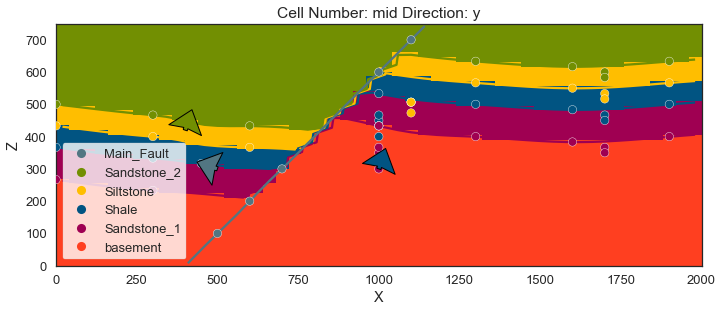

In [63]:
gp.plot_2d(geo_model, show_data=True)
plt.show()

In [64]:
edges, centroids = tp.compute_topology(geo_model)

In [65]:
edges

{(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 5), (3, 4), (3, 5), (4, 5)}

In [66]:
centroids

{1: array([19.59982026, 25.0286342 , 40.0263125 ]),
 2: array([25.17945109, 24.59032874, 31.92319292]),
 3: array([25.41815961, 24.53094463, 28.00142508]),
 4: array([25.69517906, 24.55702479, 23.10089532]),
 5: array([27.72107715, 24.04185422, 10.48556819])}

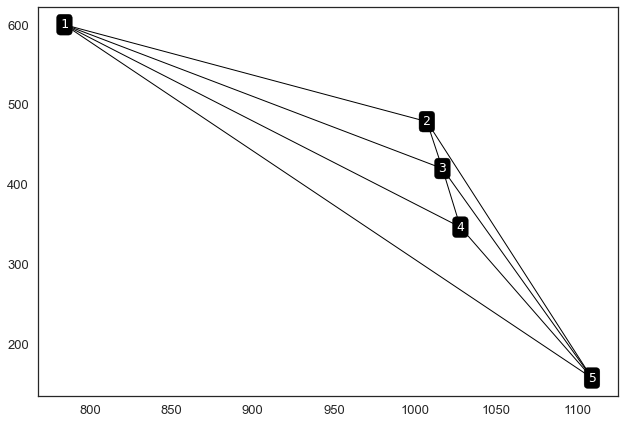

In [67]:
gp.plot.plot_topology(geo_model, edges, centroids)
plt.show()

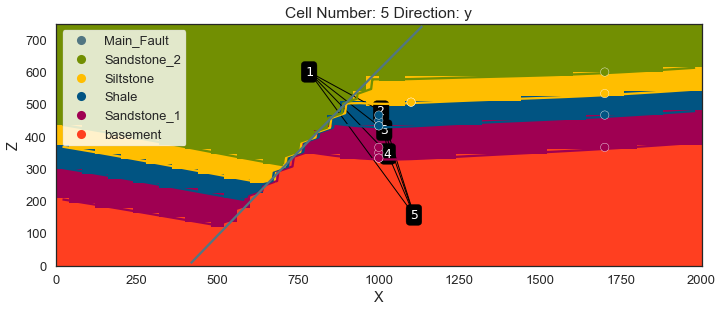

In [68]:
gp.plot_2d(geo_model, cell_number=[5], show=False)
gp.plot.plot_topology(geo_model, edges, centroids, scale=True)
plt.show()

In [69]:
M = tp.get_adjacency_matrix(geo_model, edges, centroids)
print(M)

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False  True  True False False  True]
 [False False False False False  True  True False False  True]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False  True  True False False False]]


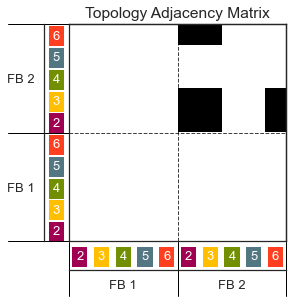

In [70]:
tp.plot_adjacency_matrix(geo_model, M)


surface
Main_Fault     #527682
Sandstone_2    #728f02
Siltstone      #ffbe00
Shale          #015482
Sandstone_1    #9f0052
basement       #ff3f20
Name: color, dtype: object


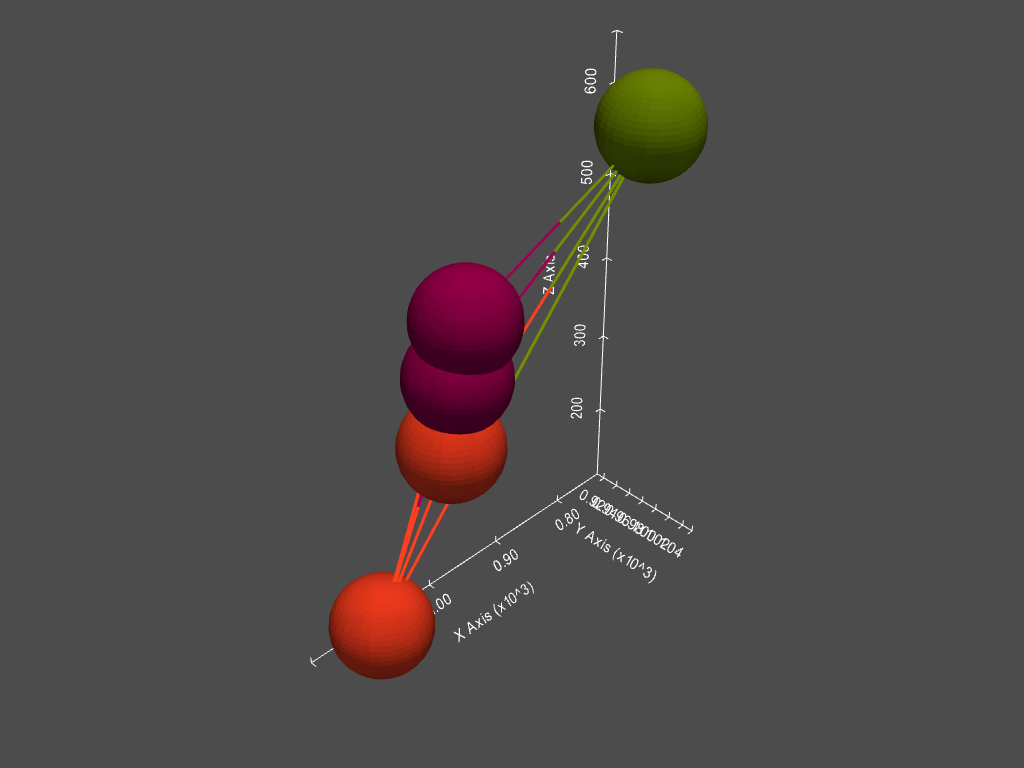

In [71]:
from gempy.plot._vista import Vista
gpv = Vista(geo_model)
gpv.plot_topology(edges, centroids)
gpv.show()

In [72]:
lith_lot = tp.get_lot_node_to_lith_id(geo_model, centroids)
lith_lot

{1: 2, 2: 5, 3: 5, 4: 6, 5: 6}

In [73]:
fault_lot = tp.get_lot_node_to_fault_block(geo_model, centroids)
fault_lot

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0}

In [1]:
tp.get_lot_lith_to_node_id(lith_lot)

NameError: name 'tp' is not defined

In [305]:
# Importing GemPy
import gempy as gp

# Importing aux libraries
import numpy as np
import matplotlib.pyplot as pl

In [306]:
geo_model = gp.create_model('Model1')

In [307]:
geo_model = gp.init_data(geo_model, extent=[0, 1000, 0, 200, -800, 0], resolution=[100, 10, 100])

Active grids: ['regular']


In [308]:
gp.set_interpolator(geo_model, theano_optimizer='fast_compile', verbose=[]) ## to help in computing and gathering all data ##

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range            1296.14814
$C_o$               40000.0
drift equations         [3]


In [309]:
geo_model.set_default_surfaces()

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2


In [310]:
geo_model.add_surface_points(X=500, Y=0.01, Z=-100, surface='surface1') 
geo_model.add_surface_points(X=700, Y=0.01, Z=-100, surface='surface1') 
geo_model.add_surface_points(X=200, Y=0.01, Z=-300, surface='surface1') 
geo_model.add_surface_points(X=0, Y=0.01, Z=-500, surface='surface1')
geo_model.add_surface_points(X=800, Y=0.01, Z=-300, surface='surface1') 
geo_model.add_surface_points(X=1000, Y=0.01, Z=-500, surface='surface1') 
geo_model.add_orientations(X=350, Y=0, Z=-300, surface='surface1', pole_vector=(0, 0, 1))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
0,350.0,0.0,-300.0,0.0,0.0,1.0,0.01,surface1


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


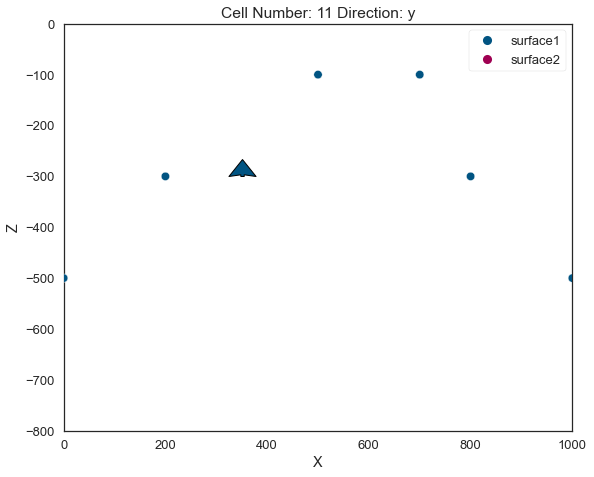

In [311]:
gp.plot_2d(geo_model, cell_number=11)

In [312]:
gp.compute_model(geo_model)


Lithology ids 
  [2. 2. 2. ... 1. 1. 1.] 

In [313]:
geo_model.additional_data.kriging_data

,values
range,1296.14814
$C_o$,40000.0
drift equations,[3]


In [314]:
geo_model.additional_data.rescaling_data

,values
rescaling factor,2000.0
centers,"[500.0, 0.005, -300.0]"


C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


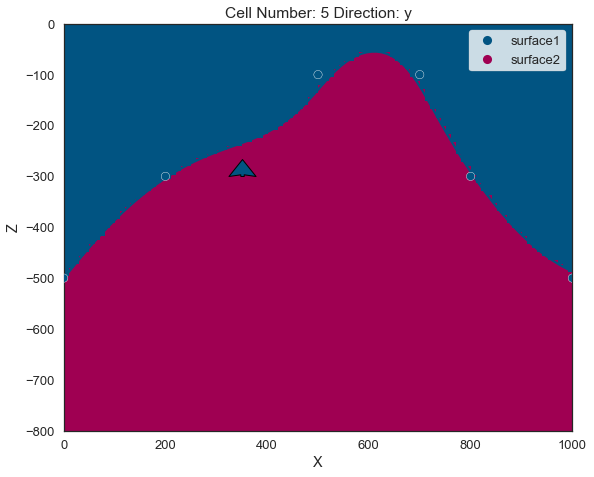

In [315]:
gp.plot_2d(geo_model, cell_number=[5])

In [316]:
geo_model.add_surfaces(['surface3', 'basement'])

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2
2,surface3,Default series,3,#ffbe00,3
3,basement,Default series,4,#728f02,4


In [317]:
geo_model.add_surface_points(X=500, Y=0.01, Z=-400, surface='surface2') 
geo_model.add_surface_points(X=200, Y=0.01, Z=500, surface='surface2') 
geo_model.add_surface_points(X=0, Y=0.01, Z=-700, surface='surface2')
geo_model.add_surface_points(X=800, Y=0.01, Z=-500, surface='surface2') 
geo_model.add_surface_points(X=1000, Y=0.01, Z=-700, surface='surface2') 

,X,Y,Z,smooth,surface
0,500.0,0.01,-100.0,0.000001,surface1
1,700.0,0.01,-100.0,0.000001,surface1
2,200.0,0.01,-300.0,0.000001,surface1
3,0.0,0.01,-500.0,0.000001,surface1
4,800.0,0.01,-300.0,0.000001,surface1
5,1000.0,0.01,-500.0,0.000001,surface1
6,500.0,0.01,-400.0,0.000001,surface2
7,200.0,0.01,500.0,0.000001,surface2
8,0.0,0.01,-700.0,0.000001,surface2
9,800.0,0.01,-500.0,0.000001,surface2


In [318]:
gp.compute_model(geo_model)


Lithology ids 
  [4. 4. 4. ... 1. 1. 1.] 

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


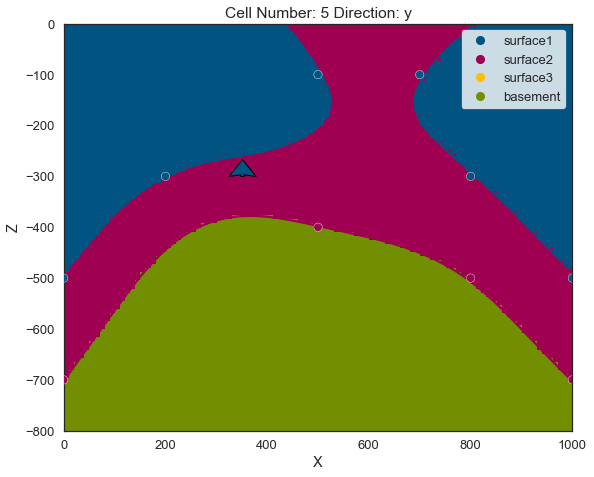

In [319]:
gp.plot_2d(geo_model, cell_number=5, legend='force')
gp.plot_3d(geo_model)

In [320]:
geo_model.add_surface_points(X=500, Y=0.01, Z=-600, surface='surface3') 
geo_model.add_surface_points(X=200, Y=0.01, Z=-700, surface='surface3') 
geo_model.add_surface_points(X=0, Y=0.01, Z=-1000, surface='surface3')
geo_model.add_surface_points(X=800, Y=0.01, Z=-700, surface='surface3') 
geo_model.add_surface_points(X=1000, Y=0.01, Z=-1000, surface='surface3') 

,X,Y,Z,smooth,surface
0,500.0,0.01,-100.0,0.000001,surface1
1,700.0,0.01,-100.0,0.000001,surface1
2,200.0,0.01,-300.0,0.000001,surface1
3,0.0,0.01,-500.0,0.000001,surface1
4,800.0,0.01,-300.0,0.000001,surface1
5,1000.0,0.01,-500.0,0.000001,surface1
6,500.0,0.01,-400.0,0.000001,surface2
7,200.0,0.01,500.0,0.000001,surface2
8,0.0,0.01,-700.0,0.000001,surface2
9,800.0,0.01,-500.0,0.000001,surface2


In [321]:
gp.compute_model(geo_model)


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

C:\Users\AHMED\anaconda3\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()
C:\Users\AHMED\anaconda3\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


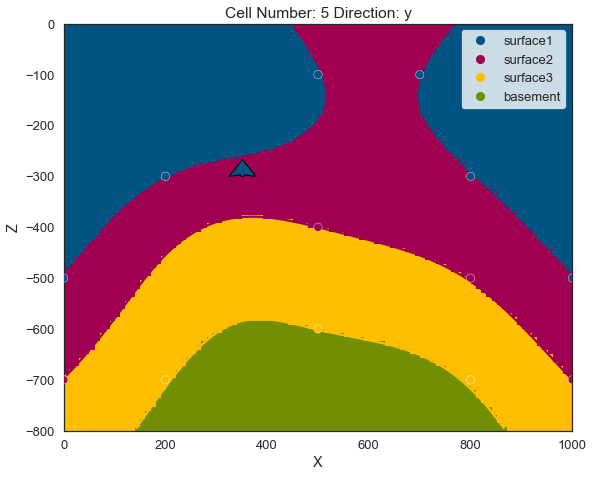

In [322]:
gp.plot_2d(geo_model, cell_number=5, legend='force')
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

In [323]:
geo_model.add_features('Fault1')   ### add fault ###

,order_series,BottomRelation,isActive,isFault,isFinite
Default series,1,Erosion,True,False,False
Fault1,2,Erosion,False,False,False


In [324]:
geo_model.reorder_features(['Fault1', 'Default series'])

,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Erosion,False,False,False
Default series,2,Erosion,True,False,False


In [325]:
geo_model.set_is_fault('Fault1')

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault1,1,Fault,False,True,False
Default series,2,Erosion,True,False,False


In [326]:
geo_model.add_surfaces('fault1')

,surface,series,order_surfaces,color,id
0,surface1,Default series,1,#015482,1
1,surface2,Default series,2,#9f0052,2
2,surface3,Default series,3,#ffbe00,3
3,basement,Default series,4,#728f02,4
4,fault1,Default series,5,#443988,5


In [327]:
gp.map_stack_to_surfaces(geo_model, {'Fault1': 'fault1'})

,surface,series,order_surfaces,color,id
4,fault1,Fault1,1,#443988,1
0,surface1,Default series,1,#015482,2
1,surface2,Default series,2,#9f0052,3
2,surface3,Default series,3,#ffbe00,4
3,basement,Default series,4,#728f02,5


In [328]:
geo_model.add_surface_points(X=0, Y=0, Z=-0, surface='fault1')
geo_model.add_surface_points(X=200, Y=0, Z=-100, surface='fault1')
geo_model.add_surface_points(X=400, Y=0, Z=-300, surface='fault1')
geo_model.add_surface_points(X=600, Y=0, Z=-500, surface='fault1')
geo_model.add_surface_points(X=800, Y=0, Z=-700, surface='fault1')
geo_model.add_surface_points(X=1000, Y=0, Z=-800, surface='fault1')
geo_model.add_orientations(X=0, Y=0, Z=-0, surface='fault1', pole_vector=(.3, 0, .3))

,X,Y,Z,G_x,G_y,G_z,smooth,surface
1,0.0,0.0,0.0,0.3,0.0,0.3,0.01,fault1
0,350.0,0.0,-300.0,0.0,0.0,1.0,0.01,surface1


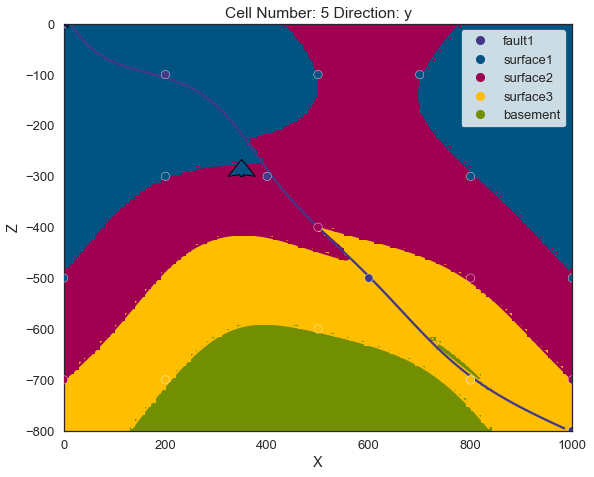

In [330]:
gp.compute_model(geo_model)
gp.plot_2d(geo_model,cell_number=5, legend='force')
gp.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})